In [1]:
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__


'2.4.0'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [5]:
img = mpimg.imread(r"C:\Users\21625\Desktop\101_ObjectCategories\airplanes\image_0001.jpg")


In [6]:
type(img)

numpy.ndarray

In [7]:
img.shape


(164, 398, 3)

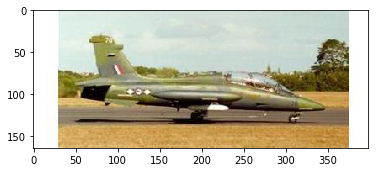

In [9]:
imgplot = plt.imshow(img)

(161, 262, 3)


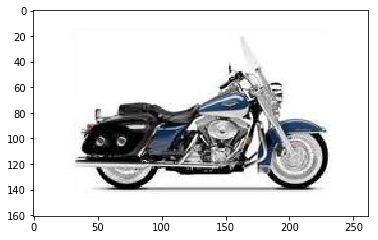

In [10]:
img2 = mpimg.imread(r"C:\Users\21625\Desktop\101_ObjectCategories\Motorbikes\image_0001.jpg")
imgplot = plt.imshow(img2)
print(img2.shape)

ImageDataGenerator génère des lots de données d'images tensorielles avec une augmentation des données en temps réel. ImageDataGenerator crée de nombreux lots d'images en appliquant des sélections et des transformations aléatoires (telles que la rotation et le décalage) par lots. Il augmente ainsi la diversité de l'ensemble de données. L'augmentation des données accroît la diversité des données, ce qui est très utile surtout lorsque le nombre d'images est limité. L'augmentation de la diversité de l'ensemble de données permet d'obtenir des résultats plus précis et empêche également le modèle d'être surajusté.

Les images sont dans les dossiers "avions" et "motos". J'ai placé 640 images de chaque catégorie dans le dossier de formation et 160 images dans le dossier de validation. Implémentons les objets ImageDataGenerator pour la formation et la validation 



In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [12]:
train_datagen = ImageDataGenerator(rescale=1/255) #Normalize the pixel values
validation_datagen = ImageDataGenerator(rescale=1/255)

In [13]:
#File path to the folder containin images
train_dir = os.path.join(r"C:\Users\21625\Desktop\101_ObjectCategories\train")
validation_dir = os.path.join(r"C:\Users\21625\Desktop\101_ObjectCategories\valid")

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

Found 1290 images belonging to 2 classes.
Found 308 images belonging to 2 classes.


In [15]:
model = tf.keras.models.Sequential([
                                    
    # First convolution layer
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Second convolution layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Third convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the pooled feature maps
    tf.keras.layers.Flatten(),

    # Fully connected hidden layer
    tf.keras.layers.Dense(128, activation='relu'),

    # Output layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [19]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99): 
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [21]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,  #640 images / batch_size of 32
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=5, #160 images / batch_size of 32
      callbacks = [callbacks]
) 

Epoch 1/10
20/20 [==============================] - 21s 831ms/step - loss: 1.6201 - accuracy: 0.5878 - val_loss: 0.3588 - val_accuracy: 0.7625
Epoch 2/10
20/20 [==============================] - 11s 548ms/step - loss: 0.2963 - accuracy: 0.8496 - val_loss: 0.0389 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 10s 475ms/step - loss: 0.1255 - accuracy: 0.9555 - val_loss: 0.0452 - val_accuracy: 0.9875
Epoch 4/10
20/20 [==============================] - 9s 456ms/step - loss: 0.0751 - accuracy: 0.9812 - val_loss: 0.0176 - val_accuracy: 0.9937
Epoch 5/10
20/20 [==============================] - 9s 453ms/step - loss: 0.0479 - accuracy: 0.9875 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 9s 468ms/step - loss: 0.0429 - accuracy: 0.9860 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 9s 459ms/step - loss: 0.0212 - accuracy: 0.9946 - val_loss: 0.0354 - val_accuracy: 0.9937
Epo

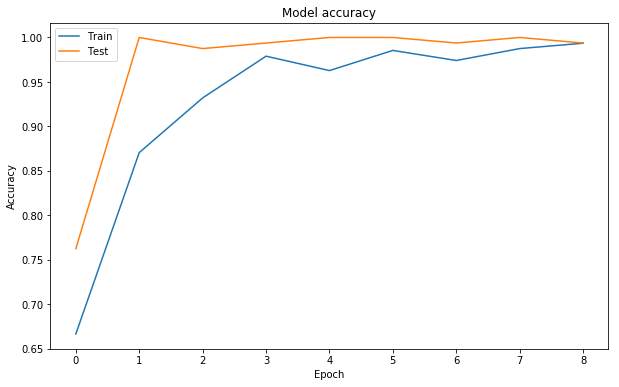

In [22]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


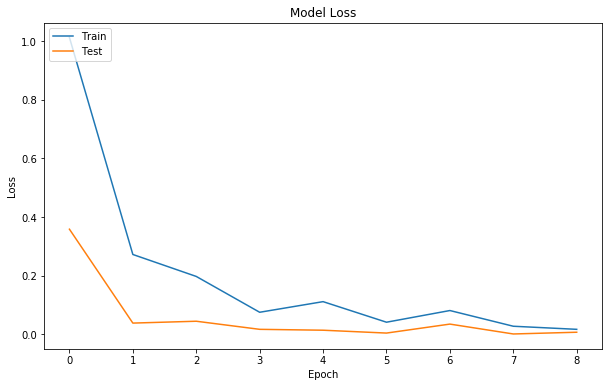

In [24]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
test_dir = os.path.join(r"C:\Users\21625\Desktop\101_ObjectCategories\test")

In [28]:
test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

Found 21 images belonging to 2 classes.


In [29]:
model.evaluate(test_generator)

1/1 [==============================] - 2s 2s/step - loss: 0.0026 - accuracy: 1.0000


[0.0026468406431376934, 1.0]

In [31]:
from keras.applications.vgg16 import VGG16
model = VGG16()

553467904/553467096 [==============================] - 139s 0us/step


In [41]:
model = VGG16()

In [42]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [36]:
img_shape=224

In [44]:
train_datagen = ImageDataGenerator(rescale=1/255) #Normalize the pixel values
validation_datagen = ImageDataGenerator(rescale=1/255)

In [45]:
#File path to the folder containin images
train_dir = os.path.join(r"C:\Users\21625\Desktop\101_ObjectCategories\vgg16\train")
validation_dir = os.path.join(r"C:\Users\21625\Desktop\101_ObjectCategories\vgg16\valid")

In [46]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 1290 images belonging to 2 classes.
Found 308 images belonging to 2 classes.


In [47]:
history1 = model.fit(
      train_generator,
      steps_per_epoch=20,  #640 images / batch_size of 32
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=5, #160 images / batch_size of 32
      
) 

Epoch 1/10


ValueError: in user code:

    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\losses.py:1608 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\backend.py:4979 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\21625\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\ops\nn_impl.py:174 sigmoid_cross_entropy_with_logits
        (logits.get_shape(), labels.get_shape()))

    ValueError: logits and labels must have the same shape ((None, 1000) vs (None, 1))
